In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/knn-dataset/knn-data/7.xor.csv
/kaggle/input/knn-dataset/knn-data/meshgrid_image.png
/kaggle/input/knn-dataset/knn-data/3.concertriccir2.csv
/kaggle/input/knn-dataset/knn-data/4.linearsep.csv
/kaggle/input/knn-dataset/knn-data/1.ushape.csv
/kaggle/input/knn-dataset/knn-data/6.overlap.csv
/kaggle/input/knn-dataset/knn-data/9.random.csv
/kaggle/input/knn-dataset/knn-data/8.twospirals.csv
/kaggle/input/knn-dataset/knn-data/5.outlier.csv
/kaggle/input/knn-dataset/knn-data/2.concerticcir1.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('/kaggle/input/knn-dataset/knn-data/3.concertriccir2.csv',header=None,names=['X','Y','class'])

In [6]:
df.head()

,X,Y,class
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0


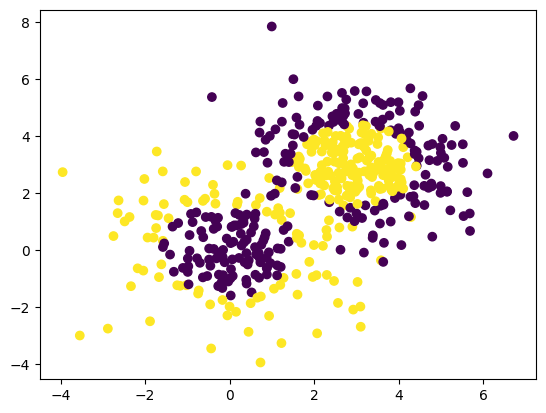

In [7]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [8]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [9]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

In [10]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
history1 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4551 - loss: 0.7075 - val_accuracy: 0.4100 - val_loss: 0.6778
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4036 - loss: 0.7124 - val_accuracy: 0.4500 - val_loss: 0.6758
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4176 - loss: 0.7078 - val_accuracy: 0.4500 - val_loss: 0.6750
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4359 - loss: 0.7067 - val_accuracy: 0.4400 - val_loss: 0.6750
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5101 - loss: 0.6867 - val_accuracy: 0.4900 - val_loss: 0.6753
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4474 - loss: 0.6953 - val_accuracy: 0.4700 - val_loss: 0.6757
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4551 - loss: 0.6949 - val_accuracy: 0.4800 - val_loss: 0.6763
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4721 - loss: 0.6923 - val_accuracy: 0.5100 - 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


<Axes: >

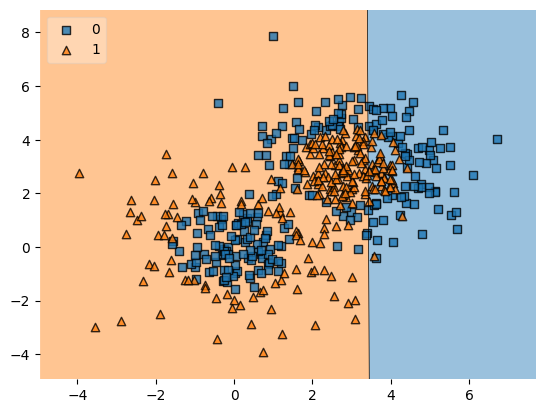

In [13]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [14]:
model = Sequential()

model.add(Dense(3,activation='relu',input_dim=2))
model.add(BatchNormalization())
model.add(Dense(2,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 3)                   │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 2)                   │               8 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 30 (120.00 B)

 Non-trainable params: 10 (40.00 B)

In [15]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
history2 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4520 - loss: 0.7009 - val_accuracy: 0.5700 - val_loss: 0.7383
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4644 - loss: 0.6881 - val_accuracy: 0.5700 - val_loss: 0.7101
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4747 - loss: 0.7095 - val_accuracy: 0.5300 - val_loss: 0.6926
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4872 - loss: 0.6868 - val_accuracy: 0.5200 - val_loss: 0.6814
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4662 - loss: 0.6928 - val_accuracy: 0.4900 - val_loss: 0.6736
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5314 - loss: 0.6885 - val_accuracy: 0.4800 - val_loss: 0.6672
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5091 - loss: 0.6732 - val_accuracy: 0.4600 - val_loss: 0.6622
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5554 - loss: 0.6866 - val_accuracy: 0.4500 - 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

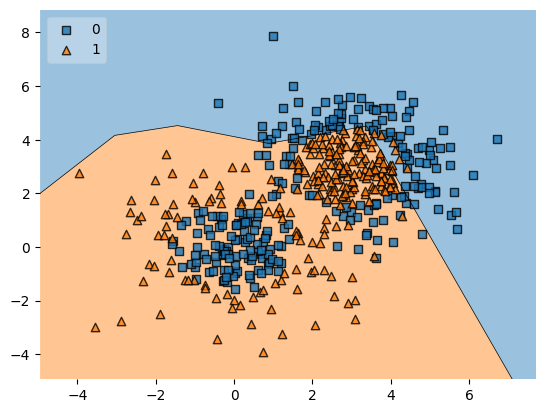

In [17]:
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

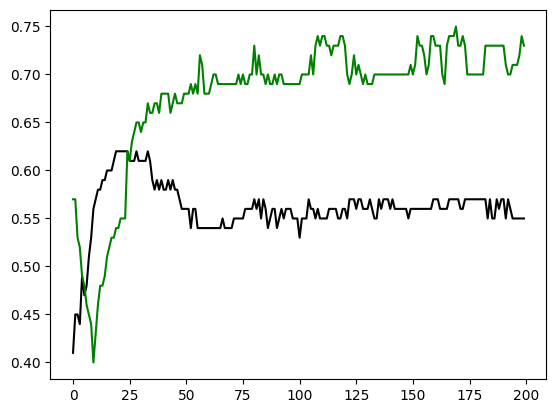

In [18]:
plt.plot(history1.history['val_accuracy'],color='black')
plt.plot(history2.history['val_accuracy'],color='green')

In [24]:
model = Sequential()

model.add(Dense(3,activation='relu',input_dim=2))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 15)                  │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 85 (340.00 B)

 Trainable params: 85 (340.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
history4 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4438 - loss: 0.7486 - val_accuracy: 0.3900 - val_loss: 0.6804
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4204 - loss: 0.7258 - val_accuracy: 0.3800 - val_loss: 0.6800
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3940 - loss: 0.7231 - val_accuracy: 0.4700 - val_loss: 0.6817
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4151 - loss: 0.7123 - val_accuracy: 0.4400 - val_loss: 0.6840
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4775 - loss: 0.7057 - val_accuracy: 0.5200 - val_loss: 0.6856
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5226 - loss: 0.7000 - val_accuracy: 0.5800 - val_loss: 0.6873
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5680 - loss: 0.6977 - val_accuracy: 0.5800 - val_loss: 0.6890
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5978 - loss: 0.6898 - val_accuracy: 0.4800 - 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


<Axes: >

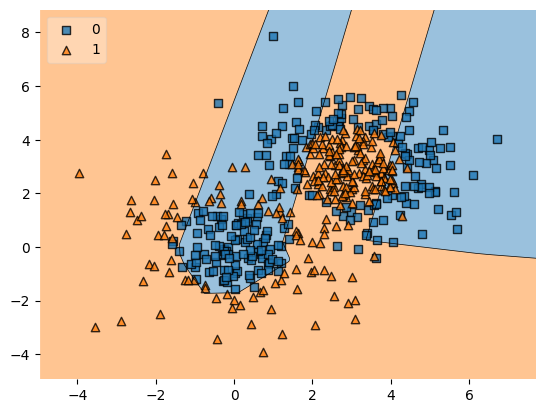

In [27]:
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [20]:
model = Sequential()

model.add(Dense(3,activation='relu',input_dim=2))
model.add(BatchNormalization())
model.add(Dense(15,activation='relu'))
model.add(BatchNormalization())
# model.add(Dense(10,activation='relu'))
# model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 3)                   │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 15)                  │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 15)                  │              60 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 157 (628.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 36 (144.00 B)

In [21]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
history3 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4091 - loss: 0.9295 - val_accuracy: 0.4300 - val_loss: 0.7396
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4422 - loss: 0.8528 - val_accuracy: 0.4300 - val_loss: 0.7465
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4372 - loss: 0.8064 - val_accuracy: 0.4300 - val_loss: 0.7530
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4585 - loss: 0.7705 - val_accuracy: 0.4300 - val_loss: 0.7553
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5204 - loss: 0.7205 - val_accuracy: 0.4300 - val_loss: 0.7566
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5481 - loss: 0.6936 - val_accuracy: 0.4300 - val_loss: 0.7581
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5815 - loss: 0.6721 - val_accuracy: 0.4300 - val_loss: 0.7522
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6003 - loss: 0.6646 - val_accuracy: 0.4300 - 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

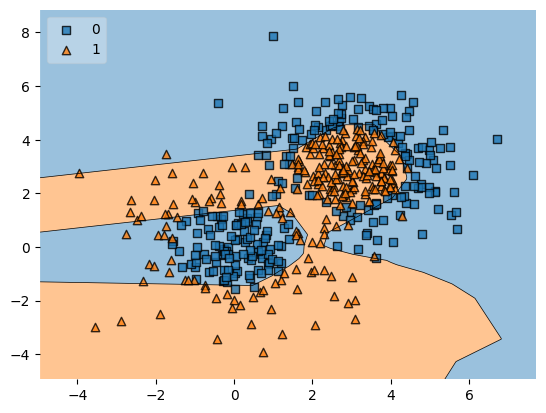

In [23]:
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

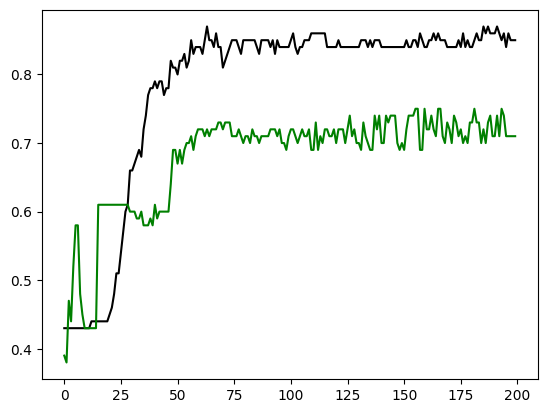

In [28]:
plt.plot(history3.history['val_accuracy'],color='black')
plt.plot(history4.history['val_accuracy'],color='green')